In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import h5py
import scipy.io as sio
import mat73
import os

In [2]:
path = 'C:/ML/datasets/convnet'
name = 'Data_2_camera_f_60mm_8by8_actuators_04_Dec_12_25.mat'

In [2]:
path = 'C:/ML/datasets/convnet'
name = 'Data_2_camera_f_60mm_8by8_actuators_04_Dec_12_25.mat'

try:
    dset = sio.loadmat(os.path.join(path, name))
except NotImplementedError:
    dset = mat73.loadmat(os.path.join(path, name))

ERROR:root:ERROR: MATLAB type not supported: System.String, (uint32)
ERROR:root:ERROR: MATLAB type not supported: string, (uint32)


In [5]:
print(os.path.dirname(os.path.join(path, name)))
basename, ext = os.path.splitext(name)

print(basename)
print(ext)
savename = os.path.join(path, f"{basename}.hdf5")


C:/ML/datasets/convnet
Data_2_camera_f_60mm_8by8_actuators_04_Dec_12_25
.mat


In [8]:
savename = os.path.join(path, f"{basename}.hdf5")
with h5py.File(savename, 'w') as hf:
    for key_name in dset:
        print(key_name)
        if key_name not in ['SerialCam', 'SerialNumberCam']:
            hf.create_dataset(name=key_name, data=dset[key_name])

FarFieldIntens
Map
NearFieldIntens
NoiseFarFieldIntens
NoiseNearFieldIntens
NumberOfCamera
SerialCam
SerialNumberCam


In [9]:
del dset

In [11]:
with h5py.File(savename, 'r') as hf:
    print(hf.keys())
    dset = {}
    for key in hf.keys():
        dset[key] = np.array(hf[key])



<KeysViewHDF5 ['FarFieldIntens', 'Map', 'NearFieldIntens', 'NoiseFarFieldIntens', 'NoiseNearFieldIntens', 'NumberOfCamera']>


In [10]:
from dsetconv import loaders
dset = loaders.load_h5file(savename, keys=['FarFieldIntens', 'Map', 'NearFieldIntens'])
print(dset.keys())

Popped {key}
Popped {key}


KeyboardInterrupt: 

In [26]:
for key in dset.keys():
    print(f"{key}, {dset[key].shape}")

print(dset['NumberOfCamera'])

FarFieldIntens, (15, 1000, 512, 512)
Map, (15, 1000, 1, 34, 34)
NearFieldIntens, (15, 1000, 256, 256)
NoiseFarFieldIntens, (2, 100, 512, 512)
NoiseNearFieldIntens, (2, 100, 256, 256)
NumberOfCamera, ()
2.0


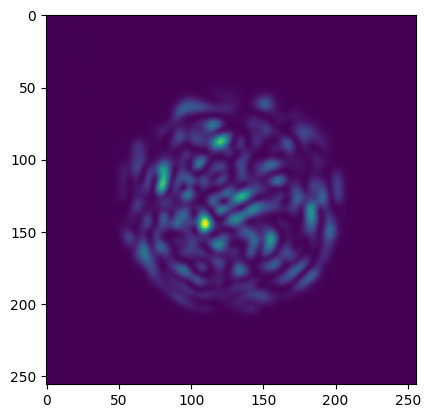

In [16]:
import matplotlib.pyplot as plt

plt.imshow(dset['NearFieldIntens'][1,1,...])